In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
from Tools import tic, toc, get_loader, fit_data, predict_data, classification_results, accuracy_lagorce, accuracy, histoscore
import os, pickle
record_path = '../Records/EXP_03_NMNIST'

# Replication of HOTS results and new dataset

- les résultats de HOTS sont donnés avec un histogramme moyen par classe, on a répliqué ces résultats (reproductibilité de Lagorce 2017) 
- quand on passe sur N-MNIST, les performances avec cet histogramme moyenné sur l'ensemble des digits d'une classe baissent beaucoup (97.5% sur alphabet dataset -> 67% sur N-MNIST)
- un moyen d'améliorer les performances de l'encodage du réseau HOTS avec un classifier simple est d'utiliser un k-NN (Maro, 2020), on s'en servira pour le reste du papier pour comparer la méthodologie de HOTS avec nos résultats
- on propose une méthode online et bio-plausible qui est meilleure (90% après une centaine d'events (en output) puis plafonne)

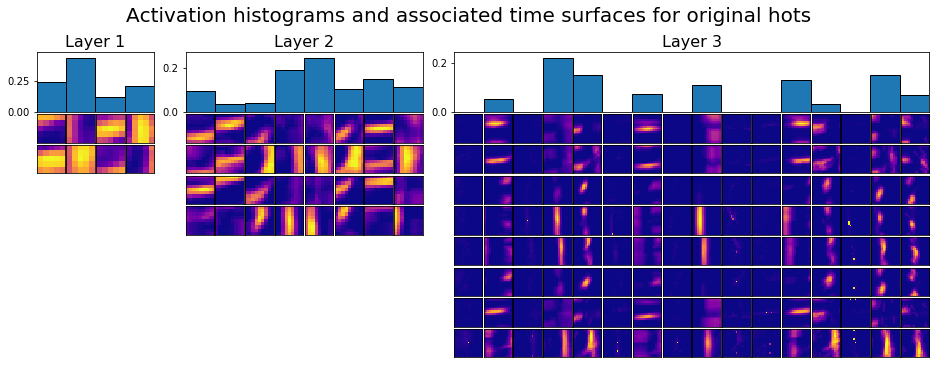

Classification results on the simple alphabet dataset: 97.5%


In [11]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation2.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap, score = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = accuracy(trainmap, testmap, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

2021-03-18_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True


 52%|█████▏    | 52/100 [03:52<03:34,  4.47s/it]


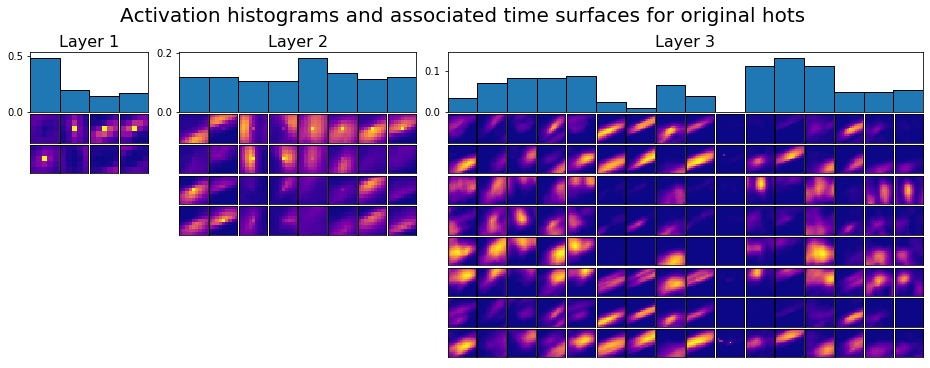

In [20]:
from Network import network, histoscore
import numpy as np
hots = network(krnlinit='first', tau=5, homeo=False, timestr='2021-03-18')
hots = hots.learning1by1()
hots.plotlayer();

In [21]:
trainmap = hots.running(nb_digit=5000)
testmap  = hots.running(train=False, nb_digit=833)
acc = accuracy_lagorce(trainmap, testmap, 'bhatta')*100
print(f'Classification results on the simple alphabet dataset: {np.round(acc)}%')

../Records/EXP_03_NMNIST/train/2021-03-18_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_5000_[None, None]_histav.pkl
../Records/EXP_03_NMNIST/test/2021-03-18_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_True_833_[None, None]_histo.pkl
Classification results on the simple alphabet dataset: 67.0%


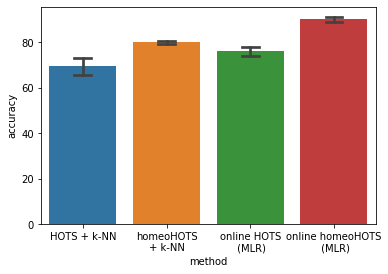

In [42]:
import seaborn as sns
hots = np.random.normal(70,20,100)
homhots = np.random.normal(80,4,100)
onlinehots = np.random.normal(75,10,100)
onlinehomhots = np.random.normal(90,5,100)
ax = sns.barplot(data=[hots,homhots,onlinehots,onlinehomhots], capsize=.2)
ax.set_xlabel('method');
ax.set_ylabel('accuracy');
order=["HOTS + k-NN", "homeoHOTS\n+ k-NN", "online HOTS\n (MLR)","online homeoHOTS\n (MLR)"]
ax.set_xticklabels(order);

# Online classification on raw inputs

In [8]:
test_set, nb_pola, name_net = get_loader(name, record_path, nb_test, False, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

In [9]:
pred_target, true_target = predict_data(test_set, model, nb_test)

np.mean(accuracy)=0.782


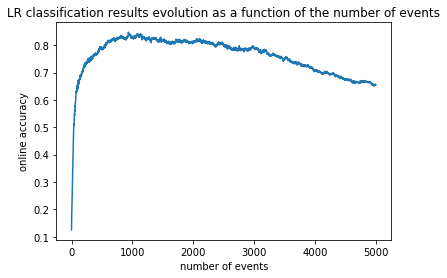

In [10]:
mean_acc, online_acc = classification_results(pred_target, true_target, nb_test, verbose= True)

# LR on the output of homeoHOTS

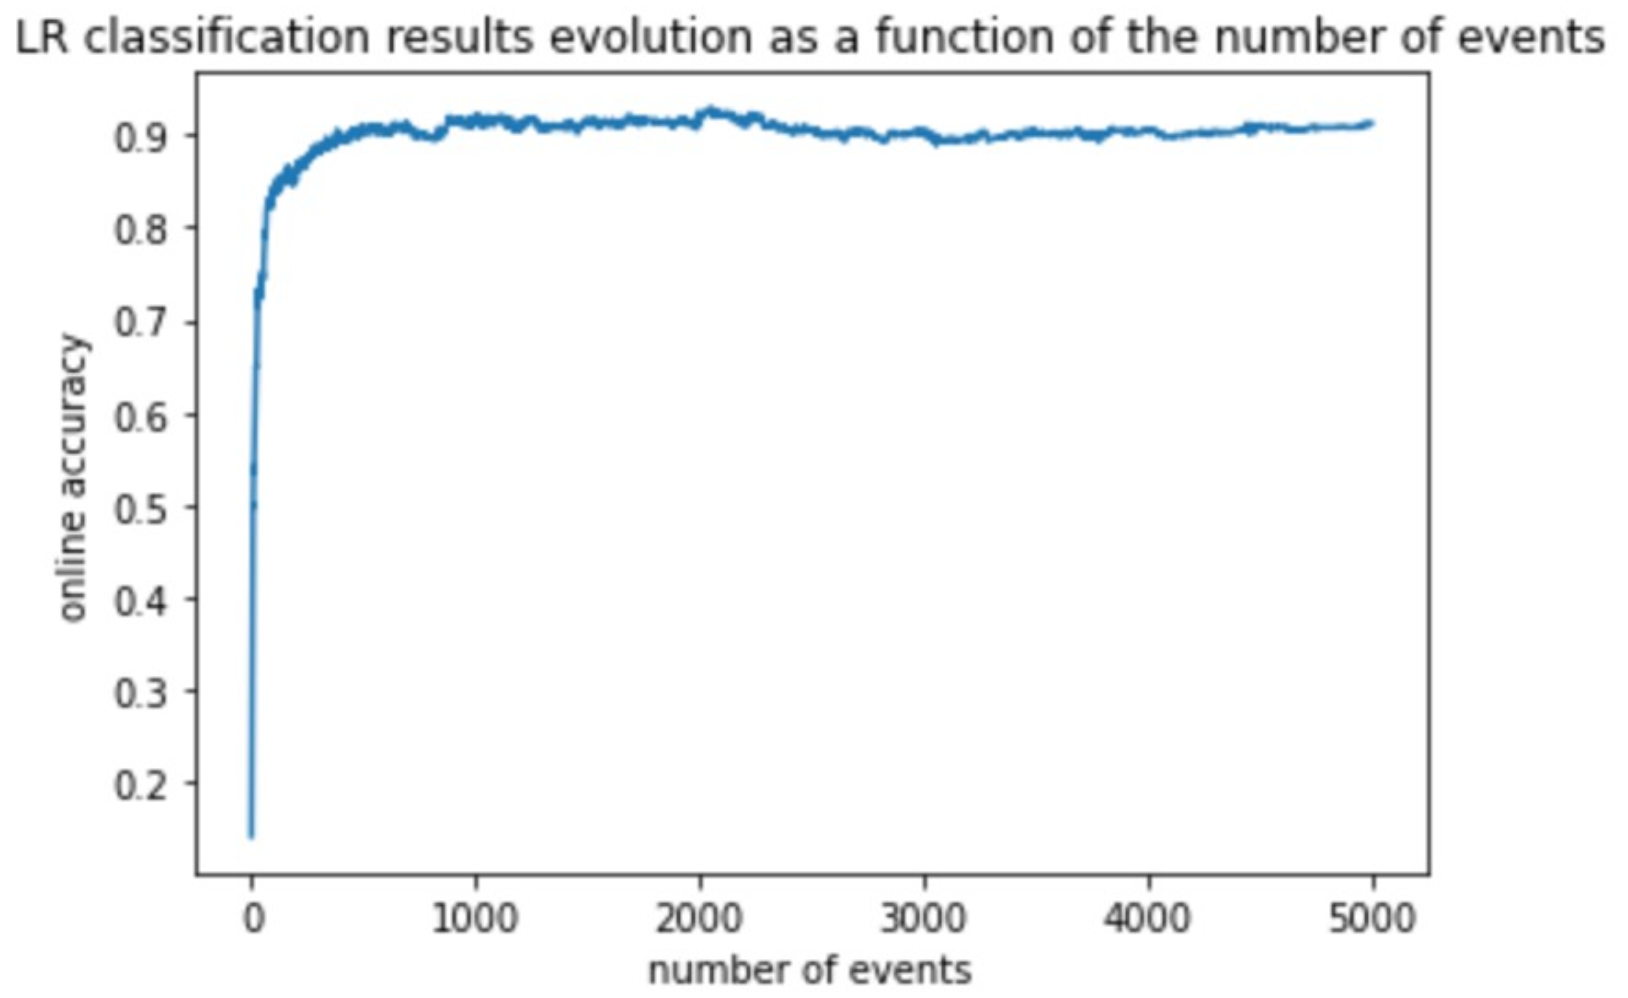

In [8]:
from IPython.display import Image
Image("../../5f22d412742c360001c92b46/fig/online.png")

# Robustness

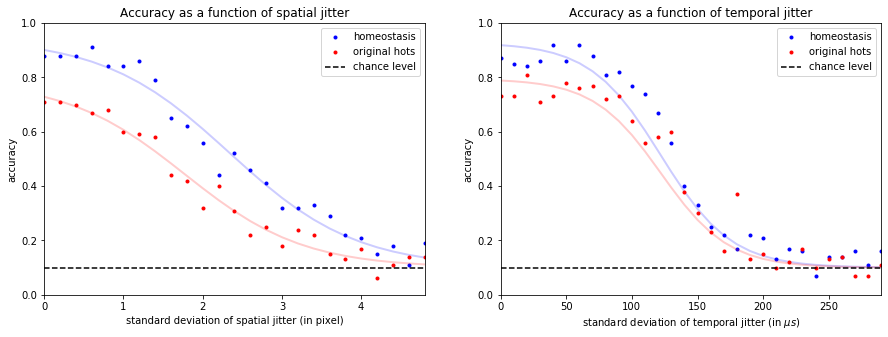

In [11]:
Image("../../paper/5f22d412742c360001c92b46/fig/jitter.png")

# Discussion

- lien avec la STDP
- les time surfaces ne sont peut être pas appropriées en tant que telles pour la catégorization d'objet
- 